In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

In [36]:
import json
fpl_df = pd.read_csv('player_history_2020_21.csv')
player_list = json.load(open('FPL_2020_21_player_list.jscsrc'))

In [37]:
fpl_df
player_list.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [38]:
player_list_df = pd.DataFrame(player_list['elements'])

In [39]:
player_list_df = player_list_df[['code', 'element_type', 'first_name',
       'second_name', 'team', 'team_code', 'total_points']]

In [40]:
player_list_df['Full_Name'] = player_list_df['first_name'] + ' ' + player_list_df['second_name']

In [41]:
player_list_df.drop(columns =['first_name', 'second_name'],inplace=True)

In [42]:
player_list['element_types']
id_to_pos = {1 : 'GKP', 2 : 'DEF', 3 :'MID' , 4 : 'FWD' }
for i,j in id_to_pos.items():
    player_list_df['element_type'].loc[player_list_df['element_type'] == i] = j

/Users/shailmirpuri/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [43]:
team_keys = player_list['teams']
code_to_team = {}
for i in range(len(team_keys)):
    id_num = team_keys[i]['id']
    team_name = team_keys[i]['name']
    code_to_team[id_num] = team_name
    

In [44]:
for i,j in code_to_team.items():
    player_list_df['team'].loc[player_list_df['team'] == i] = j

/Users/shailmirpuri/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [45]:
player_list_df.drop(columns = ['team_code', 'total_points'], inplace = True)

In [46]:
player_list_df

,code,element_type,team,Full_Name
0,37605,MID,Arsenal,Mesut Ã–zil
1,39476,DEF,Arsenal,Sokratis Papastathopoulos
2,41270,DEF,Arsenal,David Luiz Moreira Marinho
3,54694,MID,Arsenal,Pierre-Emerick Aubameyang
4,58822,DEF,Arsenal,CÃ©dric Soares
...,...,...,...,...
476,216208,GKP,Wolves,Matija Sarkic
477,222531,MID,Wolves,Morgan Gibbs-White
478,247632,MID,Wolves,Pedro Lomba Neto
479,428610,MID,Wolves,Bruno AndrÃ© Cavaco Jordao


In [47]:
fpl_df = fpl_df.merge(player_list_df, left_on = 'element_code', right_on= 'code')

In [48]:
fpl_df.drop(columns = 'code', inplace = True)

In [49]:
fpl_df.columns

Index(['seasons', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element_code', 'end_cost', 'goals_conceded', 'goals_scored',
       'ict_index', 'influence', 'minutes', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'saves', 'season_name', 'start_cost',
       'threat', 'total_points', 'yellow_cards', 'element_type', 'team',
       'Full_Name'],
      dtype='object')

In [50]:
fpl_df[['seasons', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element_code', 'end_cost', 'goals_conceded', 'goals_scored',
       'ict_index', 'influence', 'minutes', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'saves', 'season_name', 'start_cost',
       'threat', 'total_points', 'yellow_cards', 'element_type', 'team',
       'Full_Name']]

,seasons,assists,bonus,bps,clean_sheets,creativity,element_code,end_cost,goals_conceded,goals_scored,...,red_cards,saves,season_name,start_cost,threat,total_points,yellow_cards,element_type,team,Full_Name
0,0,10,18,162,13,0.0,37605,96,23,5,...,0,0,2013/14,100,0,137,0,MID,Arsenal,Mesut Ã–zil
1,1,6,13,511,9,0.0,37605,90,16,4,...,0,0,2014/15,90,0,103,0,MID,Arsenal,Mesut Ã–zil
2,2,19,30,861,17,0.0,37605,92,31,6,...,0,0,2015/16,85,0,200,4,MID,Arsenal,Mesut Ã–zil
3,3,11,19,729,12,1649.3,37605,95,30,8,...,0,0,2016/17,95,734,167,2,MID,Arsenal,Mesut Ã–zil
4,4,9,11,506,8,1287.5,37605,93,36,4,...,0,0,2017/18,95,555,112,4,MID,Arsenal,Mesut Ã–zil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,4,8,13,522,9,891.5,47431,70,19,6,...,0,0,2017/18,70,715,130,1,MID,Arsenal,Willian Borges Da Silva
1817,5,7,6,475,11,1165.5,47431,71,25,3,...,0,0,2018/19,75,742,108,2,MID,Arsenal,Willian Borges Da Silva
1818,6,9,26,698,10,1177.7,47431,73,35,9,...,0,0,2019/20,70,930,168,4,MID,Arsenal,Willian Borges Da Silva
1819,0,1,1,117,3,71.8,180135,45,9,1,...,0,0,2018/19,45,106,26,2,MID,Newcastle,Sean Longstaff


In [51]:
fpl_df = fpl_df[fpl_df['minutes'] > 1500]

/Users/shailmirpuri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='minutes', ylabel='Density'>

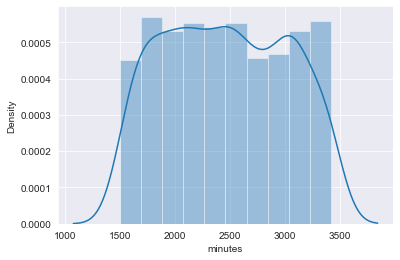

In [52]:
sns.distplot(fpl_df['minutes'])

In [53]:
fpl_df['element_type'].unique()
price_category = {}
for pos in (fpl_df['element_type'].unique()):
    subset = fpl_df[fpl_df['element_type'] == pos]
    quantiles = subset['start_cost'].quantile([0.5, 0.85])
    price_category[pos] = quantiles.to_list()

In [54]:
price_category.values()

dict_values([[55.0, 80.0], [50.0, 60.0], [70.0, 100.0], [50.0, 55.0]])

In [55]:
pd.DataFrame(price_category, index = ['Lower Quantile', 'Upper Quantile'])/10

,MID,DEF,FWD,GKP
Lower Quantile,5.5,5.0,7.0,5.0
Upper Quantile,8.0,6.0,10.0,5.5


In [56]:
fpl_df ['price_range'] = None
price_range = []
def price_categories(price_ranges):
    price_ranges = sorted(price_ranges, reverse = True)
    if fpl_df['start_cost'].iloc[i] >= price_ranges[0]:
        price_range.append('Premium')
    elif fpl_df['start_cost'].iloc[i] >= price_ranges[1]:
        price_range.append('Mid Range')
    else: 
        price_range.append('Budget')

In [57]:
for i in range(len(fpl_df)):
    position = fpl_df['element_type'].iloc[i]
    price_ranges = price_category[position]
    price_categories(price_ranges = price_ranges)

In [58]:
fpl_df['price_range'] = price_range

In [59]:
fpl_df['points_per_90minutes'] =  90 * fpl_df['total_points'] / fpl_df['minutes']

In [60]:
fpl_df['season_name'].unique()

array(['2013/14', '2014/15', '2015/16', '2016/17', '2017/18', '2018/19',
       '2019/20', '2011/12', '2012/13', '2010/11', '2008/09', '2009/10',
       '2006/07', '2007/08'], dtype=object)

In [61]:
fpl_df.columns

Index(['seasons', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element_code', 'end_cost', 'goals_conceded', 'goals_scored',
       'ict_index', 'influence', 'minutes', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'saves', 'season_name', 'start_cost',
       'threat', 'total_points', 'yellow_cards', 'element_type', 'team',
       'Full_Name', 'price_range', 'points_per_90minutes'],
      dtype='object')

In [62]:
features = ['season_name','Full_Name', 'price_range', 'element_type','start_cost', 'team', 'goals_scored', 'assists', 'points_per_90minutes', 'total_points']

In [63]:
top_10_performers = fpl_df[features].sort_values('total_points', ascending = False).head(10).reset_index()

In [64]:
top_10_performers['team'].iloc[3] = 'Leicester'
top_10_performers.drop(columns = ['index'], inplace= True)

/Users/shailmirpuri/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [65]:
top_10_performers.rename(columns = {'season_name' : 'season', 'Full_Name' : 'Player', 'element_type' : 'position'}, inplace = True)
top_10_performers['start_cost'] = top_10_performers['start_cost']/10

In [66]:
top_10_performers.index = range(1,11)
top_10_performers.to_csv('top10.csv')

In [67]:
fpl_df[features].sort_values('points_per_90minutes', ascending = False).head(10)

,season_name,Full_Name,price_range,element_type,start_cost,team,goals_scored,assists,points_per_90minutes,total_points
940,2017/18,Mohamed Salah,Premium,MID,90,Liverpool,32,12,9.387263,303
988,2013/14,Sergio AgÃ¼ero,Premium,FWD,110,Man City,17,11,9.188482,156
1038,2019/20,Riyad Mahrez,Premium,MID,85,Man City,11,14,8.143744,175
1021,2019/20,Kevin De Bruyne,Premium,MID,95,Man City,13,23,8.096774,251
1517,2016/17,Harry Kane,Premium,FWD,110,Spurs,29,7,7.990488,224
1045,2017/18,Raheem Sterling,Premium,MID,80,Man City,18,17,7.976006,229
992,2017/18,Sergio AgÃ¼ero,Premium,FWD,115,Man City,21,6,7.760204,169
989,2014/15,Sergio AgÃ¼ero,Premium,FWD,120,Man City,26,10,7.677725,216
598,2012/13,Theo Walcott,Premium,MID,90,Everton,14,13,7.637795,194
1046,2018/19,Raheem Sterling,Premium,MID,110,Man City,17,15,7.602888,234


/Users/shailmirpuri/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.8, 'Where should you invest your budget?')

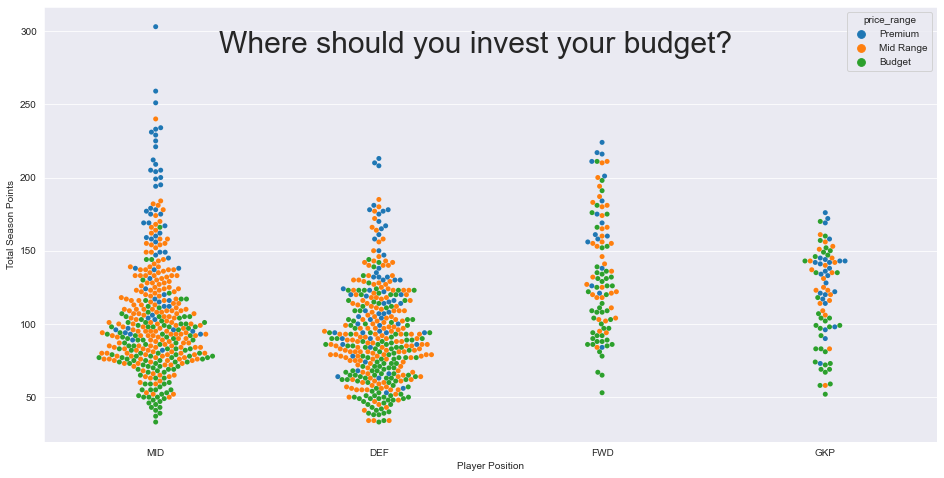

In [84]:
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.figure(figsize = (16,8))
sns.swarmplot(fpl_df['element_type'], fpl_df['total_points'], hue = fpl_df['price_range'])
plt.xlabel('Player Position')
plt.ylabel('Total Season Points')
plt.figtext(.5,.8,'Where should you invest your budget?',fontsize=30,ha='center')

In [69]:
fpl_df['Standard_Deviation'] = fpl_df['points_per_90minutes']
price_position_breakdown = fpl_df.groupby(['element_type', 'price_range'])
price_position_breakdown = price_position_breakdown.agg({'points_per_90minutes' : 'mean', 'start_cost' : 'count', 'Standard_Deviation': 'std'})

In [70]:
price_position_breakdown = price_position_breakdown.reset_index()

In [71]:
price_position_breakdown.to_csv('price_position.csv')

In [72]:
price_position_breakdown

,element_type,price_range,points_per_90minutes,start_cost,Standard_Deviation
0,DEF,Budget,2.957349,133,0.626712
1,DEF,Mid Range,3.430027,169,0.828016
2,DEF,Premium,4.111873,61,0.807225
3,FWD,Budget,4.459969,49,0.908009
4,FWD,Mid Range,5.449408,34,0.907287
5,FWD,Premium,6.600783,16,1.339658
6,GKP,Budget,3.547722,33,0.525294
7,GKP,Mid Range,3.680052,21,0.336732
8,GKP,Premium,3.953792,25,0.547092
9,MID,Budget,3.129676,120,0.753695


In [73]:
# Let's perform a two sample t-test 
def t_test(position):
    print("The Null Hypothesis for this test is that there is no difference between budget and premimum players in the {} position".format(position))
    df = price_position_breakdown[price_position_breakdown['element_type'] == position]
    print("The significance level for our test is 0.05")
    x2_bar = df['points_per_90minutes'].iloc[-1]
    x1_bar =df['points_per_90minutes'].iloc[1]
    sd2 = df['Standard_Deviation'].astype('int').iloc[-1]
    sd1 = df['Standard_Deviation'].astype('int').iloc[1]
    n2 = df['start_cost'].astype('int').iloc[-1]
    n1 = df['start_cost'].astype('int').iloc[1]
    SE = np.sqrt(((sd2)^2)/n2 + ((sd1)^2)/n1)
    dof = min([(n2-1), (n1-1)])
    t_stat = (x2_bar - x1_bar) / SE
    return t_stat

In [74]:
values = []
for i in ("DEF", "MID", "FWD", "GKP"):
    values.append(t_test(i))

The Null Hypothesis for this test is that there is no difference between budget and premimum players in the DEF position
The significance level for our test is 0.05
The Null Hypothesis for this test is that there is no difference between budget and premimum players in the MID position
The significance level for our test is 0.05
The Null Hypothesis for this test is that there is no difference between budget and premimum players in the FWD position
The significance level for our test is 0.05
The Null Hypothesis for this test is that there is no difference between budget and premimum players in the GKP position
The significance level for our test is 0.05


In [75]:
hypothesis_test = pd.DataFrame(values, index = ["DEF", "MID", "FWD", "GKP"], columns = ['T-Statistic'])

In [76]:
hypothesis_test['P-Value'] = [0.00101, 0.00000696, 0.0174, 0.2603]
hypothesis_test['Significant'] = [True, True, True, False]

In [77]:
hypothesis_test

,T-Statistic,P-Value,Significant
DEF,3.227867,0.001010,True
MID,6.614818,0.000007,True
FWD,2.319871,0.017400,True
GKP,0.653919,0.260300,False


In [78]:
t_test("DEF")

The Null Hypothesis for this test is that there is no difference between budget and premimum players in the DEF position
The significance level for our test is 0.05


3.2278669862061884

In [79]:
t_test("MID")

The Null Hypothesis for this test is that there is no difference between budget and premimum players in the MID position
The significance level for our test is 0.05


6.614818105371858

In [80]:
t_test("FWD")

The Null Hypothesis for this test is that there is no difference between budget and premimum players in the FWD position
The significance level for our test is 0.05


2.31987123842839

In [81]:
t_test("GKP")

The Null Hypothesis for this test is that there is no difference between budget and premimum players in the GKP position
The significance level for our test is 0.05


0.6539187600267015